In [1]:
polyEval(coeffs, pt) = sum([coeffs[i] * pt^(i-1) for i = 1:length(coeffs)])  

polyEval (generic function with 1 method)

In [2]:
using JSON

cross_validation_best_key_Apr_AM = readstring("../temp_files/cross_validation_best_key_Apr_AM.json")
cross_validation_best_key_Apr_AM = JSON.parse(cross_validation_best_key_Apr_AM)

cross_validation_best_key_Apr_MD = readstring("../temp_files/cross_validation_best_key_Apr_MD.json")
cross_validation_best_key_Apr_MD = JSON.parse(cross_validation_best_key_Apr_MD)

cross_validation_best_key_Apr_PM = readstring("../temp_files/cross_validation_best_key_Apr_PM.json")
cross_validation_best_key_Apr_PM = JSON.parse(cross_validation_best_key_Apr_PM)

cross_validation_best_key_Apr_NT = readstring("../temp_files/cross_validation_best_key_Apr_NT.json")
cross_validation_best_key_Apr_NT = JSON.parse(cross_validation_best_key_Apr_NT)

cross_validation_best_key_Apr_weekend = readstring("../temp_files/cross_validation_best_key_Apr_weekend.json")
cross_validation_best_key_Apr_weekend = JSON.parse(cross_validation_best_key_Apr_weekend)

"(8,0.5,10000.0,1)"

In [3]:
coeffs_dict_Apr_AM = readstring("../temp_files/coeffs_dict_Apr_AM.json")
coeffs_dict_Apr_AM = JSON.parse(coeffs_dict_Apr_AM)

coeffs_dict_Apr_MD = readstring("../temp_files/coeffs_dict_Apr_MD.json")
coeffs_dict_Apr_MD = JSON.parse(coeffs_dict_Apr_MD)

coeffs_dict_Apr_PM = readstring("../temp_files/coeffs_dict_Apr_PM.json")
coeffs_dict_Apr_PM = JSON.parse(coeffs_dict_Apr_PM)

coeffs_dict_Apr_NT = readstring("../temp_files/coeffs_dict_Apr_NT.json")
coeffs_dict_Apr_NT = JSON.parse(coeffs_dict_Apr_NT)

coeffs_dict_Apr_weekend = readstring("../temp_files/coeffs_dict_Apr_weekend.json")
coeffs_dict_Apr_weekend = JSON.parse(coeffs_dict_Apr_weekend)


coeffs_best_Apr_AM = coeffs_dict_Apr_AM[cross_validation_best_key_Apr_AM]
coeffs_best_Apr_MD = coeffs_dict_Apr_MD[cross_validation_best_key_Apr_MD]
coeffs_best_Apr_PM = coeffs_dict_Apr_PM[cross_validation_best_key_Apr_PM]
coeffs_best_Apr_NT = coeffs_dict_Apr_NT[cross_validation_best_key_Apr_NT]
coeffs_best_Apr_weekend = coeffs_dict_Apr_weekend[cross_validation_best_key_Apr_weekend]

9-element Array{Any,1}:
  1.0       
 -0.00254294
  0.0549013 
 -0.206174  
  0.584212  
 -0.921056  
  0.890912  
 -0.467113  
  0.103659  

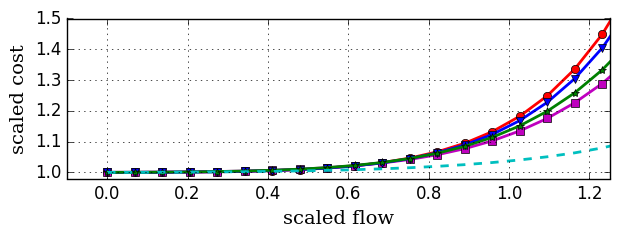

In [13]:
using PyPlot

xs = linspace(0, 1.3, 20)

#true_coeffs = [1, 0, 0, 0, .15]
#ys_true = map(x->polyEval(true_coeffs, x), xs)
#plot(xs, ys_true, "k", label="True")

ys_Apr_AM = map(x->polyEval(coeffs_best_Apr_AM, x), xs)
ys_Apr_MD = map(x->polyEval(coeffs_best_Apr_MD, x), xs)
ys_Apr_PM = map(x->polyEval(coeffs_best_Apr_PM, x), xs)
ys_Apr_NT = map(x->polyEval(coeffs_best_Apr_NT, x), xs)
ys_Apr_weekend = map(x->polyEval(coeffs_best_Apr_weekend, x), xs)

fig = figure(figsize=(7,2),)

plot(xs, ys_Apr_AM, "o-r", label="AM", linewidth=2)
plot(xs, ys_Apr_MD, "s-m", label="MD", linewidth=2)
plot(xs, ys_Apr_PM, "v-b", label="PM", linewidth=2)
plot(xs, ys_Apr_NT, "*-g", label="NT", linewidth=2)
plot(xs, ys_Apr_weekend, "--c", label="WE", linewidth=2)

# legend(frameon=false, ncol=5, bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", 
# borderaxespad=0.2, numpoints=1)

grid("on")
xlim(-0.1, 1.25);
ylim(0.98, 1.5);

font1 = Dict("family"=>"serif","color"=>"k","weight"=>"normal","size"=>14)

xlabel("scaled flow", fontdict=font1)
ylabel("scaled cost", fontdict=font1)

savefig("../temp_files/fitting_comparison_Apr.pdf")

dire = "/home/jzh/Dropbox/Research/Data-driven_estimation_inverse_optimization/" * 
"MA_traffic_IEEE_special_issue_18/imag/"

savefig(dire * "fitting_comparison_Apr.pdf", dpi=300, bbox_inches="tight")

In [5]:
cross_validation_best_key_Apr_AM

"(8,0.5,10000.0,1)"

In [6]:
outfile = open("../temp_files/cost_func_Apr.txt", "w")

write(outfile,"coeffs_Apr_AM: $(coeffs_best_Apr_AM) \n \
coeffs_Apr_MD: $(coeffs_best_Apr_MD) \n \
coeffs_Apr_PM: $(coeffs_best_Apr_PM) \n \
coeffs_Apr_NT: $(coeffs_best_Apr_NT) \n \
coeffs_Apr_weekend: $(coeffs_best_Apr_weekend) \n")

close(outfile)